# Figure 2: Hs90/RIO Averaged Time Slices
This figure shows the averaged Hs90 and RIO fields for the months of July, September, November over the two time slices  2020 - 2040 and 2050 - 2070.

### Data processing libraries.

In [1]:
import xarray as xr
import numpy as np
import os
import pandas as pd

# Hs90 Data and Functions

### Load 90th Percentile Hs Data

In [2]:
def extract_ww(filedir):
    with xr.open_dataset(filedir) as ds:
        per = np.array(ds.variables['hs_per'][:])
    return per

per_2020_7 = extract_ww('WW3_2020_2040_7.nc')
per_2020_9 = extract_ww('WW3_2020_2040_9.nc')
per_2020_11 = extract_ww('WW3_2020_2040_11.nc')

per_2060_7 = extract_ww('WW3_2050_2070_7.nc')
per_2060_9 = extract_ww('WW3_2050_2070_9.nc')
per_2060_11 = extract_ww('WW3_2050_2070_11.nc')

jul_per = np.array([per_2020_7, per_2060_7])
sep_per = np.array([per_2020_9, per_2060_9])
nov_per = np.array([per_2020_11, per_2060_11])

per_array = np.array([jul_per,sep_per,nov_per])


### Load WW3 grid data from a seperate WW3 file 
The percentile data files don't contain grid information. A seperate simulation file is needed to import the grid information for plotting. 

In [ ]:
depthdir = 'ww3.2020_dpt.nc'
with xr.open_dataset(depthdir) as ds:
    x,y = np.array(ds.variables['longitude'][:]),np.array(ds.variables['latitude'][:])
    tris = np.array(ds.variables['tri'][:])

### Plotting libraries

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.tri as tri
import matplotlib.path as mpath
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature

## Define and test Hs90 Plotting Function

(<GeoAxes: >, <matplotlib.tri._tricontour.TriContourSet at 0x1ec56fcf370>)

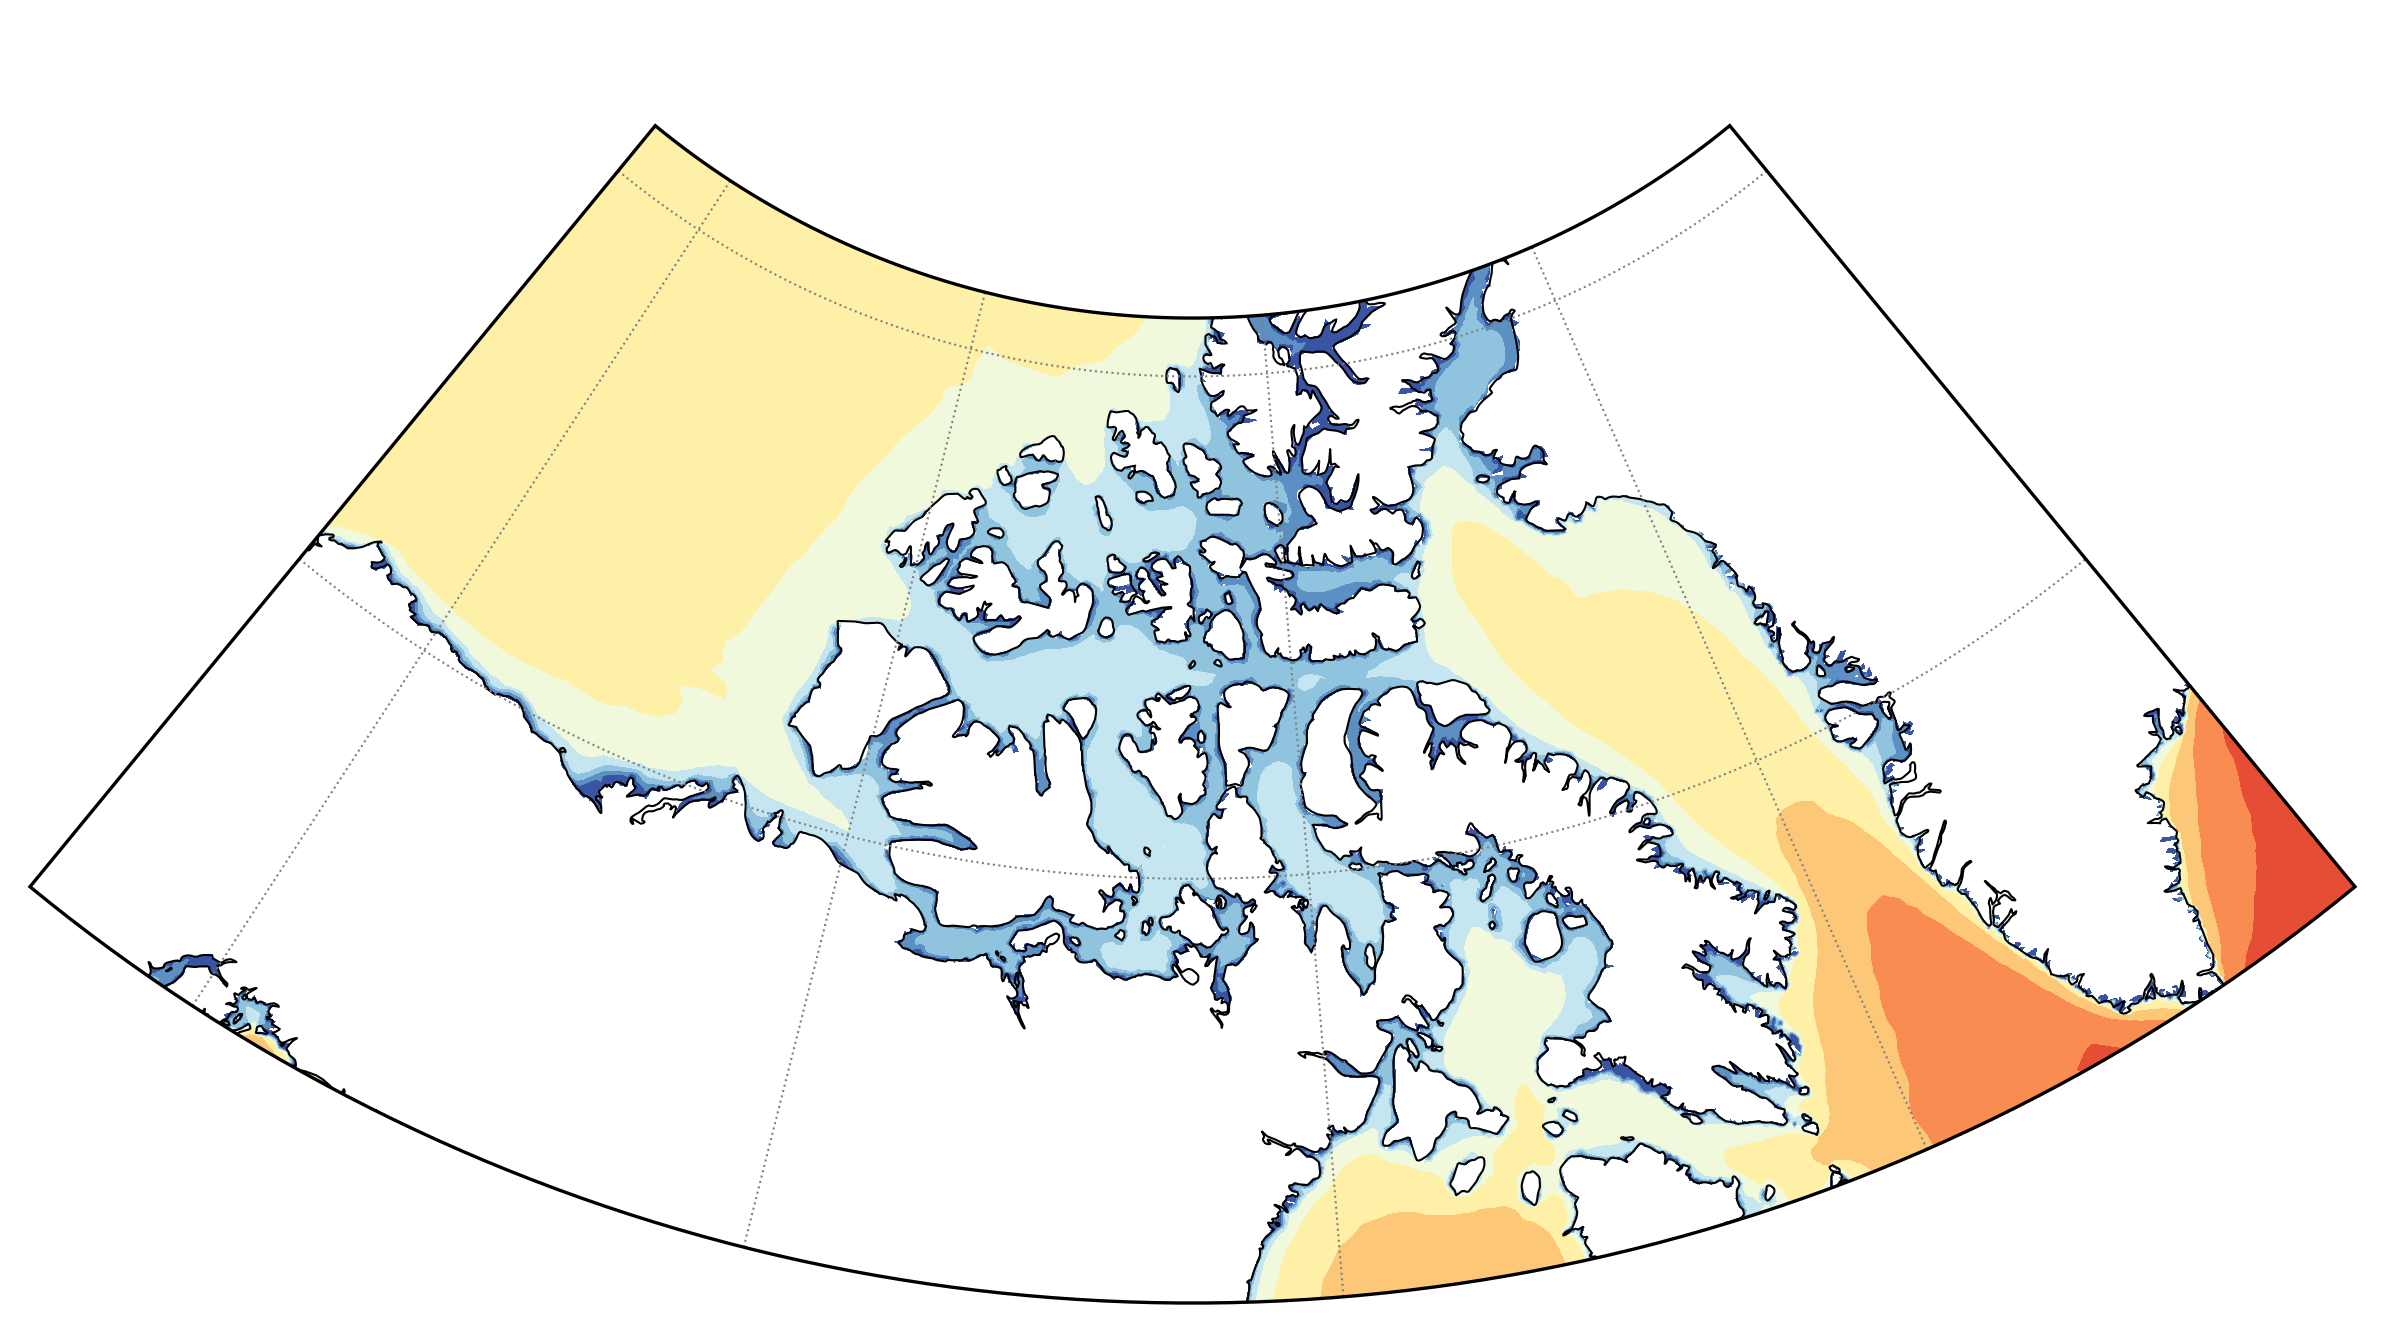

In [5]:

def ww3_plot(ax,data,x,y,tris,proj):
    x_plot, y_plot, _ = proj.transform_points(ccrs.PlateCarree(), x, y).T
    triang = tri.Triangulation(x_plot,y_plot, triangles=tris-1)

    n =100
    path = mpath.Path(
        list(zip(np.linspace(-160,-35,n), np.full(n, 81))) + \
        list(zip(np.full(n,-35), np.linspace(81,60,n))) + \
        list(zip(np.linspace(-35,-160,n), np.full(n, 60))) + \
        list(zip(np.full(n,-160), np.linspace(60,81,n)))
    )
    ax.set_boundary(path, transform=ccrs.PlateCarree())
    ax.set_extent((-160, -35, 60, 80))
    ax.coastlines(resolution='50m',linewidth=0.5)
    
    xlines, ylines = np.arange(-150, -30, 30),np.arange(60, 90, 10)
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', linestyle='dotted',
             xlocs=xlines, ylocs=ylines)

    levels = np.arange(0,5.5,0.5)
    cmap  = 'RdYlBu_r'
    cf = plt.tricontourf(triang, data, levels = levels, extend = 'max',cmap = cmap)
    
    return ax,cf

fig = plt.figure(figsize=(10,10),dpi = 300)
proj = ccrs.LambertConformal(central_longitude = -97.5,central_latitude = 70)
ax = plt.axes(projection=proj)
plt.rcParams["font.family"] = "Times New Roman"

#Test the plotting function
ww3_plot(ax,per_2060_9,x,y,tris,proj)



# POLARIS Data and Functions

### Load RIO Data
This data being loaded has already been pre-processed to contain the monthly RIO fields for Jul, Sep, and Nov averaged across models in time slices 2020-2040 and 2050-2070.

In [6]:
def extract_rio(filedir):
    with xr.open_dataset(filedir) as ds:
        var = np.array(ds.variables['RIO'][:])
        x,y = np.array(ds.variables['lon'][:]),np.array(ds.variables['lat'][:])
    return var,x,y

rio_2030_7,gcm_lon,gcm_lat = extract_rio('AVE_RIO_2020-2040_7.nc')
rio_2030_9,gcm_lon,gcm_lat = extract_rio('AVE_RIO_2020-2040_9.nc')
rio_2030_11,gcm_lon,gcm_lat = extract_rio('AVE_RIO_2020-2040_11.nc')


rio_2060_7,gcm_lon,gcm_lat = extract_rio('AVE_RIO_2050-2070_7.nc')
rio_2060_9,gcm_lon,gcm_lat = extract_rio('AVE_RIO_2050-2070_9.nc')
rio_2060_11,gcm_lon,gcm_lat = extract_rio('AVE_RIO_2050-2070_11.nc')

jul_rio = np.array([rio_2030_7, rio_2060_7])
sep_rio = np.array([rio_2030_9, rio_2060_9])
nov_rio = np.array([rio_2030_11, rio_2060_11])

rio_array = np.array([jul_rio,sep_rio,nov_rio])


## Define Function for plotting RIO data

(<GeoAxes: >, <cartopy.mpl.contour.GeoContourSet at 0x1ec5d06afa0>)

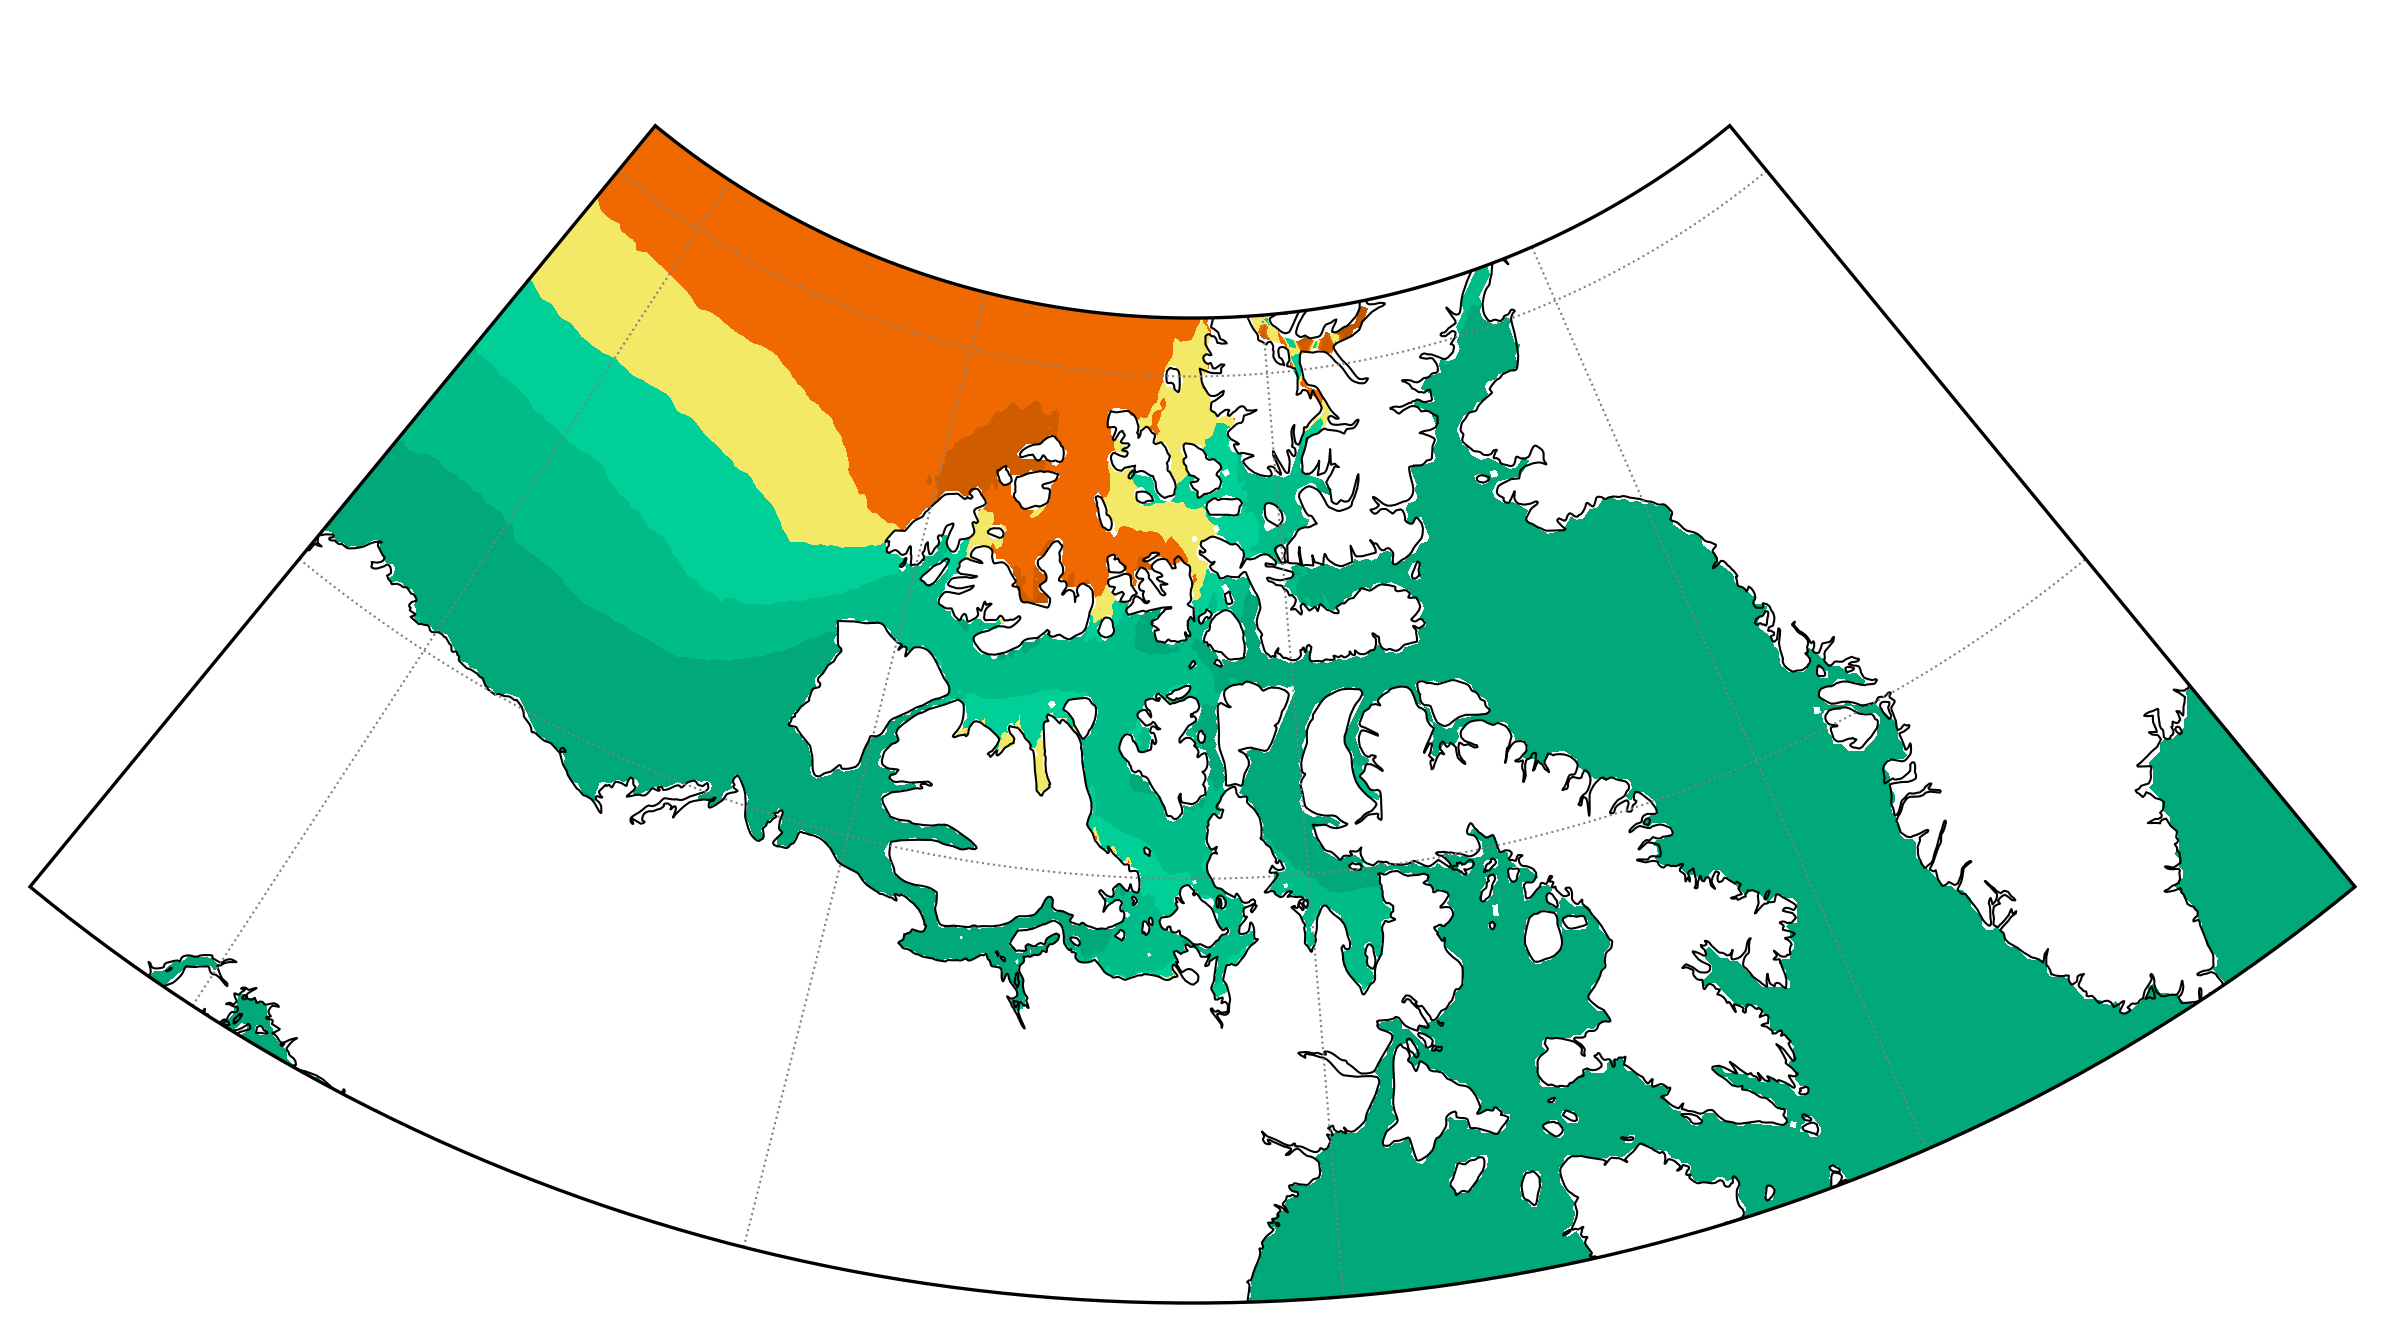

In [7]:

def rio_plot(ax,data,x,y,proj):
    #Data in Antarctica causes errors in plotting due to projection.
    #Set everything south of equator to NaN.
    data = np.where(y<0,np.nan,data)
    x_plot, y_plot, _ = proj.transform_points(ccrs.PlateCarree(), x, y).T

    ######## Create plot boundary shape #######
    n =100
    path = mpath.Path(
        list(zip(np.linspace(-160,-35,n), np.full(n, 81))) + \
        list(zip(np.full(n,-35), np.linspace(81,60,n))) + \
        list(zip(np.linspace(-35,-160,n), np.full(n, 60))) + \
        list(zip(np.full(n,-160), np.linspace(60,81,n))))
    ax.set_boundary(path, transform=ccrs.PlateCarree())
    ax.set_extent((-160, -35, 60, 80))

    ######## Location of gridlines #######
    xlines, ylines = np.arange(-150, -30, 30),np.arange(60, 90, 10)
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', linestyle='dotted',
             xlocs=xlines, ylocs=ylines)
    ax.coastlines(resolution='50m',linewidth=0.5)

    ######## Define custom colormap #######
    light_green = '#00d99e'
    dark_green = '#009E73'
    light_yellow = '#f6ee8b'
    dark_yellow = '#F0E442'
    light_red = '#fc6f00'
    dark_red = '#c15500'
    colors = [
        (0, dark_red),
        (1/3-0.01,light_red),
        (1/3,dark_yellow),
        (0.5, light_yellow),
        (0.5+0.01,light_green),
        (1, dark_green),
    ]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    levels = np.arange(-30,40,10)
    cf = ax.contourf(x_plot, y_plot,data.T,levels,cmap=cmap,extend = 'min')
    
    return ax,cf

#Test the function
fig = plt.figure(figsize=(10,10),dpi = 300)
ax = plt.axes(projection=proj)
rio_plot(ax,rio_2060_7,gcm_lon,gcm_lat,proj)



## Plot RIO and HS90 data in combined plot

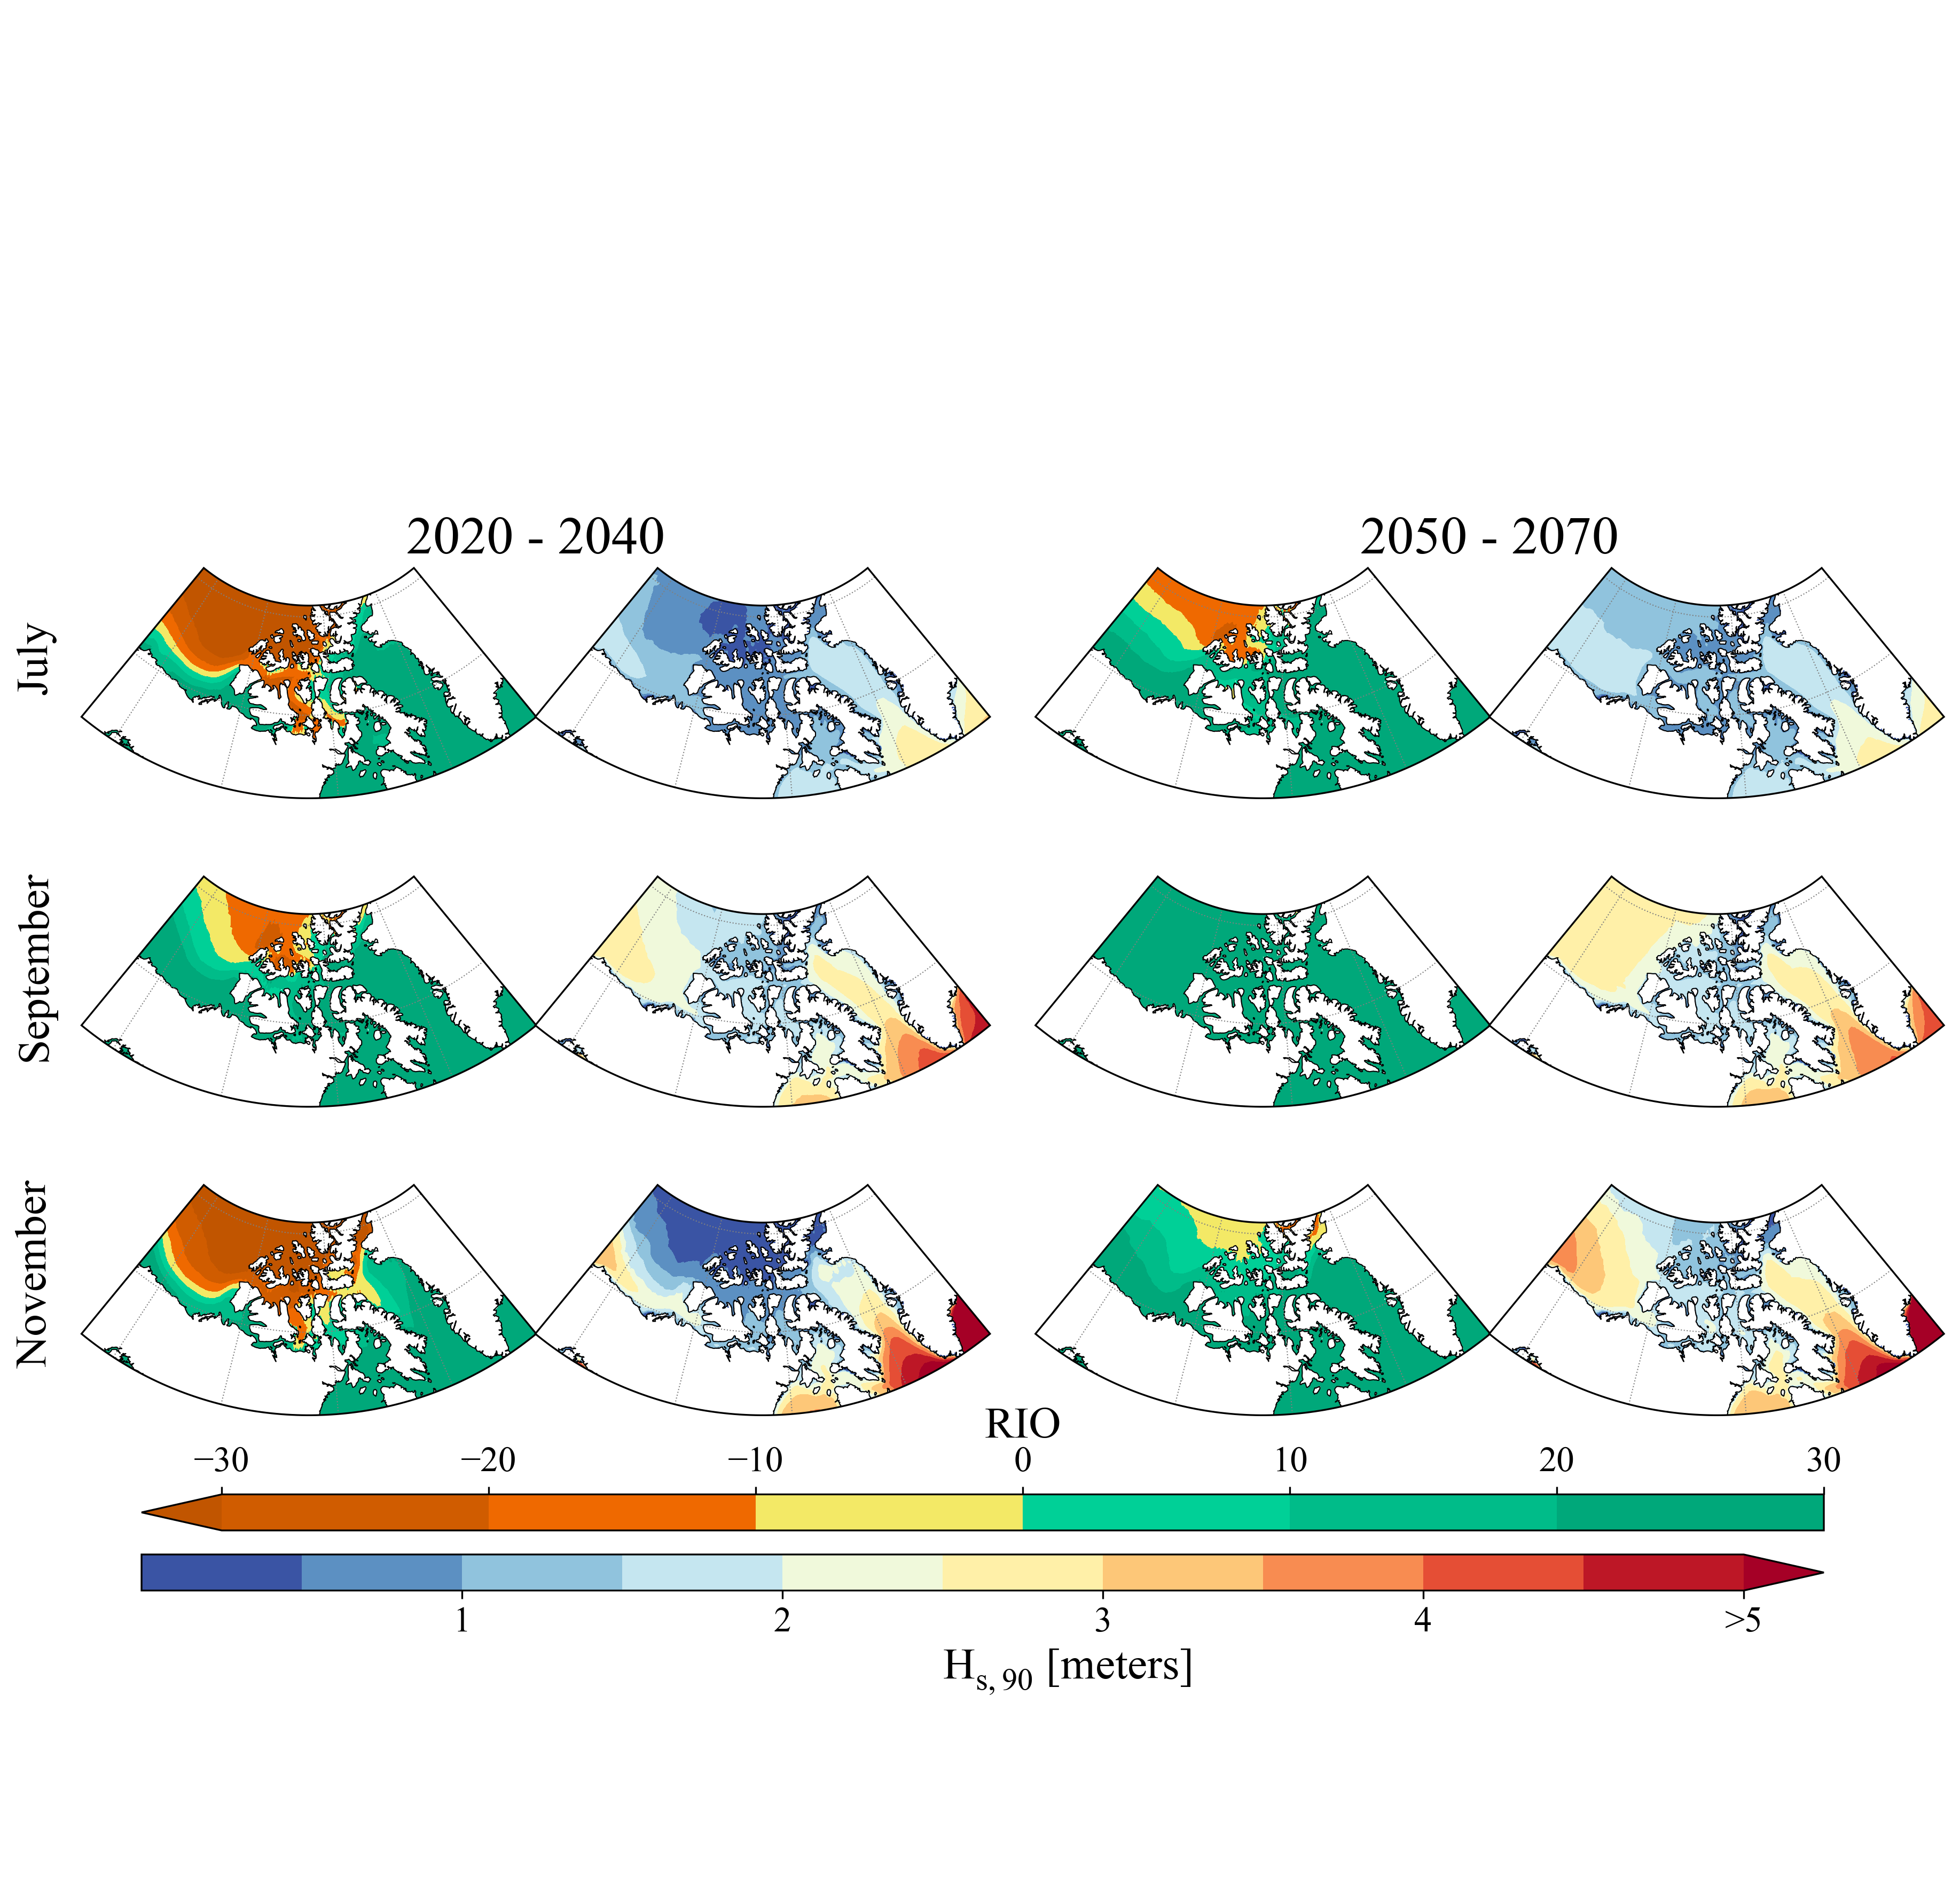

In [9]:
plt.rc('text', usetex=False)
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(15,15),dpi = 300)
gs = gridspec.GridSpec(3, 2,hspace = -0.75,wspace = 0.05)
proj = ccrs.LambertConformal(central_longitude = -97.5,central_latitude = 70)

months = [7,9,11]
month_names = ['July','September','November']

year0s = [2020,2060]
yearns = [2030,2070]
decades = ['2020 - 2040','2050 - 2070']

for k, month_name in enumerate(month_names):
    #Select the month's data
    dec_per = per_array[k,:,:]
    dec_rio = rio_array[k,:,:,:]
    for i,decade in enumerate(decades):
        
        label_ax = plt.Subplot(fig, gs[k, i])
        subgrid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[k,i],wspace = -0.002)  
        
        if i == 0:
            label_ax.text(-0.05, 0.48, month_name, va='center', ha='center', rotation=90,fontsize = 20)
            label_ax.axis('off')
            fig.add_subplot(label_ax)
        
        if k == 0:
            label_ax.text(0.5, 0.575, decade, va='center', ha='center', rotation=0,fontsize = 24)
            label_ax.axis('off')
            fig.add_subplot(label_ax)
        
        for j in np.arange(0,2,1):
            if j == 0:
                rio_data = dec_rio[i,:,:]
                ax = fig.add_subplot(subgrid[0, j], projection = proj)
                ax,cf = rio_plot(ax,rio_data,gcm_lon,gcm_lat,proj)
            
            elif j == 1:
                per_data = dec_per[i,:]
                ax = fig.add_subplot(subgrid[0, j], projection = proj)
                ax,cf = ww3_plot(ax,per_data,x,y,tris,proj)

            fig.add_subplot(ax)


            if i == 1 and k == 2 and j == 1:
                cbar_ax = fig.add_axes([0.15,0.225,0.7,0.015])
                cbar = fig.colorbar(cf,cax = cbar_ax, orientation='horizontal',label = 'above',)
                cbar.set_ticks([1, 2, 3, 4,5])
                cbar.set_ticklabels(["1", "2", "3", "4",'>5'])
                cbar.set_label(label = 'H$\mathregular{_{s,90}}$ [meters]',fontsize = '20',ha = 'left')
                cbar.ax.tick_params(labelsize = '16')
                cbar.ax.xaxis.set_label_position('bottom')
            if i == 1 and k == 2 and j == 0:
                cbar_ax = fig.add_axes([0.15,0.25,0.7,0.015])
                cbar = fig.colorbar(cf,cax = cbar_ax, orientation='horizontal',label = 'top',)
                cbar.set_label(label = 'RIO',fontsize = '20',ha = 'center')
                cbar.ax.tick_params(labelsize = '16')
                cbar.ax.xaxis.tick_top()
                cbar.ax.xaxis.set_label_position('top')

plt.savefig('combined_wave_rio_plot.tif', bbox_inches='tight', dpi=150)  # Adjust dpi as needed 

plt.show()